# PERBANDINGAN METODE KLASTER K-MEDOIDS DAN K-MEANS TERHADAP HASIL PERAMALAN KEMISKINAN DI INDONESIA MENGGUNAKAN BPNN
### by Riansyah Fazar Ramadhan

## 1. Import Dependencies

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

## 2. Data Preprocessing

In [3]:
data1 = pd.read_excel("E:/AKTUARIA FINAL SEASON/DATA/fpdata.xlsx", sheet_name="y", index_col=0)
data2 = pd.read_excel("E:/AKTUARIA FINAL SEASON/DATA/fpdata.xlsx", sheet_name="x1", index_col=0)
data3 = pd.read_excel("E:/AKTUARIA FINAL SEASON/DATA/fpdata.xlsx", sheet_name="x2", index_col=0)
data4 = pd.read_excel("E:/AKTUARIA FINAL SEASON/DATA/fpdata.xlsx", sheet_name="x3", index_col=0)

y = np.array(data1)
x1 = np.array(data2)
x2 = np.array(data3)
x3 = np.array(data4)

data1_flat = data1.values.flatten()
data2_flat = data2.values.flatten()
data3_flat = data3.values.flatten()
data4_flat = data4.values.flatten()

In [43]:
# Combine into a DataFrame
combined_df = pd.DataFrame({
    'y': data1_flat,
    'x1': data2_flat,
    'x2': data3_flat,
    'x3': data4_flat
})

# Display the combined DataFrame
print(combined_df)

# Create a Pandas Excel writer using XlsxWriter as the engine
writer = pd.ExcelWriter('output.xlsx', engine='xlsxwriter')

# Write each DataFrame to a separate sheet


with pd.ExcelWriter('output.xlsx', engine='xlsxwriter') as writer:
    combined_df.to_excel(writer, sheet_name='Sheet1', index=False)

         y      x1    x2     x3
0    17.08  -1.970  7.73  0.334
1    10.53   4.990  6.39  0.336
2     7.31   5.625  5.99  0.342
3     8.42  -1.035  6.72  0.364
4     8.86   4.555  2.73  0.361
..     ...     ...   ...    ...
573  11.49   4.775  3.04  0.351
574  16.42   5.780  6.08  0.288
575   6.46  19.460  4.60  0.300
576  20.49   3.020  5.53  0.370
577  26.03   0.710  3.49  0.386

[578 rows x 4 columns]


## ACF-PACF

### 1. ACF-PACF on each province

In [ ]:
def summarize_acf_pacf(data, max_lag=9):
    summary = {}
    
    for column in data.columns:
        ts_data = data[column].dropna()  # Ensure that each series is one-dimensional
        
        # Calculate ACF and PACF
        acf_values = acf(ts_data, nlags=max_lag)
        pacf_values = pacf(ts_data, nlags=max_lag)
        
        # Identify significant lags
        significant_acf_lags = np.where(np.abs(acf_values) > 1.96/np.sqrt(len(ts_data)))[0]
        significant_pacf_lags = np.where(np.abs(pacf_values) > 1.96/np.sqrt(len(ts_data)))[0]
        
        summary[column] = {
            'significant_acf_lags': significant_acf_lags.tolist(),
            'significant_pacf_lags': significant_pacf_lags.tolist()
        }
    
    return summary

summary = summarize_acf_pacf(data2)
summary

### 2. ACF-PACF on pooled data

<Figure size 1000x600 with 0 Axes>

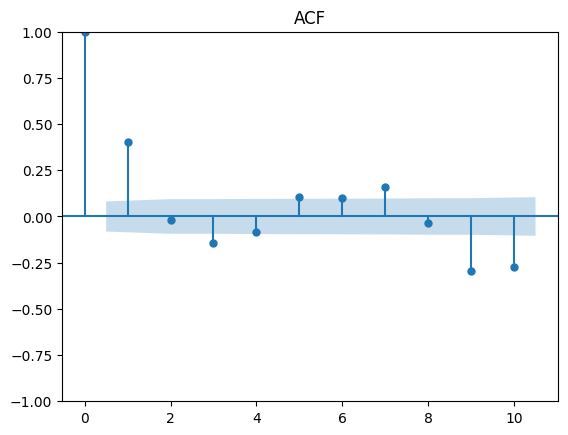

<Figure size 1000x600 with 0 Axes>

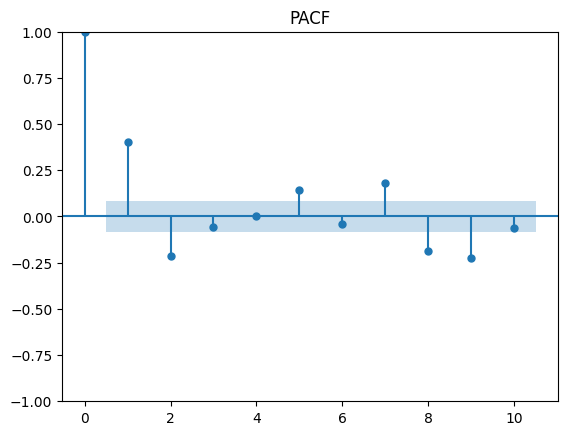

In [34]:

    # Plot ACF
    plt.figure(figsize=(10, 6))
    plot_acf(data1_flat, lags=10)
    plt.title(f'ACF')
    plt.show()

    # Plot PACF
    plt.figure(figsize=(10, 6))
    plot_pacf(data1_flat, lags=10)
    plt.title(f'PACF')
    plt.show()


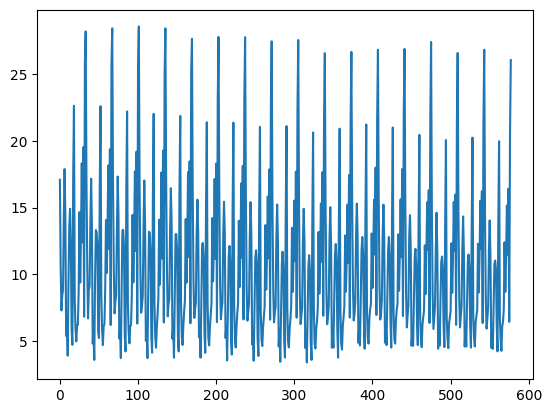

In [26]:
plt.plot(data1_flat)

In [37]:
# Fit AR model with 3 lags
model = sm.tsa.AutoReg(data1_flat, lags=3)
fit = model.fit()

print(fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  578
Model:                     AutoReg(3)   Log Likelihood               -1744.326
Method:               Conditional MLE   S.D. of innovations              5.026
Date:                Thu, 16 May 2024   AIC                           3498.653
Time:                        10:34:57   BIC                           3520.424
Sample:                             3   HQIC                          3507.144
                                  578                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2944      0.619     13.405      0.000       7.082       9.507
y.L1           0.4814      0.042     11.531      0.000       0.400       0.563
y.L2          -0.1876      0.046     -4.100      0.0

In [ ]:
    # Plot ACF
    plt.figure(figsize=(10, 6))
    plot_acf(data2_diff, lags=18)
    plt.title(f'ACF for {column}')
    plt.show()

    # Plot PACF
    plt.figure(figsize=(10, 6))
    plot_pacf(data2_diff, lags=18)
    plt.title(f'PACF for {column}')
    plt.show()

In [ ]:
data2_diff = np.diff(data2_flat)

## 3. Descriptive Statistic

In [4]:
def desc_stat(dataset):
    # Sample array
    data = dataset
    # Mean
    mean = np.mean(data)
    # Median
    median = np.median(data)
    # Standard Deviation
    std_dev = np.std(data)
    # Variance
    variance = np.var(data)
    # Minimum
    minimum = np.min(data)
    # Maximum
    maximum = np.max(data)
    # Summary of all statistics
    summary = {
        'mean': mean,
        'median': median,
        'std_dev': std_dev,
        'variance': variance,
        'min': minimum,
        'max': maximum
    }
    print(summary)

desc_stat(data1_flat)
desc_stat(data2_flat)
desc_stat(data3_flat)
desc_stat(data4_flat)


{'mean': 10.814757785467128, 'median': 9.09, 'std_dev': 5.63367436750194, 'variance': 31.738286879048385, 'min': 3.42, 'max': 28.54}
{'mean': 4.499152249134949, 'median': 5.075, 'std_dev': 4.083429959344909, 'variance': 16.674400232875566, 'min': -21.3, 'max': 25.86}
{'mean': 5.055051903114187, 'median': 4.68, 'std_dev': 1.804130041022133, 'variance': 3.2548852049185233, 'min': 0.88, 'max': 10.95}
{'mean': 0.35309688581314885, 'median': 0.351, 'std_dev': 0.03973163814753446, 'variance': 0.0015786030698866154, 'min': 0.236, 'max': 0.459}


## 5. Linearity Test

In [20]:
import numpy as np
from arch.unitroot import linearity_test

linear_test = linearity_test(data1_flat)
print(linear_test)


ImportError: cannot import name 'linearity_test' from 'arch.unitroot' (c:\Users\rians\AppData\Local\Programs\Python\Python39\lib\site-packages\arch\unitroot\__init__.py)

In [27]:
import statsmodels.api as sm

# Perform ADF test
adf_test = sm.tsa.adfuller(data1_flat)

# Extracting the results
adf_statistic = adf_test[0]
p_value = adf_test[1]
used_lag = adf_test[2]
n_obs = adf_test[3]
critical_values = adf_test[4]
aic_value = adf_test[5]

# Printing the results with labels
print("Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {adf_statistic}")
print(f"p-value: {p_value}")
print(f"Number of Lags Used: {used_lag}")
print(f"Number of Observations Used: {n_obs}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"    {key}: {value}")
print(f"AIC Value: {aic_value}")


Augmented Dickey-Fuller Test Results:
ADF Statistic: -9.216696012414147
p-value: 1.825734467645251e-15
Number of Lags Used: 19
Number of Observations Used: 558
Critical Values:
    1%: -3.4421235439968862
    5%: -2.866733577794069
    10%: -2.569536010842615
AIC Value: 3096.3850121272844


## 6. Normalization

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
y_norm = scaler.fit_transform(y)
x1_norm = scaler.fit_transform(x1)
x2_norm = scaler.fit_transform(x2)
x3_norm = scaler.fit_transform(x3)
y = y_norm.flatten()
x1_flat = x1_norm.flatten()
x2_flat = x2_norm.flatten()
x3_flat = x3_norm.flatten()
x = np.column_stack((x1_flat, x2_flat, x3_flat))

## 7. Data Splitting

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

## 8. Neural Network Architecture

In [29]:
#NN Parameter
input_node = 3
hidden_node = 6
output_node = 1

In [35]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(hidden_node, input_shape=[input_node], activation='linear'),
        tf.keras.layers.Dense(output_node)
        ])
model.compile(loss='mae', optimizer='Adam')
model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
15/15 [==============================] - 1s 3ms/step - loss: 1.8136
Epoch 2/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.7311
Epoch 3/1000
15/15 [==============================] - 0s 1ms/step - loss: 1.6549
Epoch 4/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.5798
Epoch 5/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.5106
Epoch 6/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.4440
Epoch 7/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.3799
Epoch 8/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.3211
Epoch 9/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.2640
Epoch 10/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.2097
Epoch 11/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.1597
Epoch 12/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.1140
Epoch 13/1000
15/15 [====

KeyboardInterrupt: 